## The `extent` parameter in `geomImshow()` 

A list of four numbers: `[left, right, bottom, top]` that
defines the image bounding box
in terms of 'data coordinates'.

In [1]:
%useLatestDescriptors
%use lets-plot
@file:DependsOn("org.apache.commons:commons-math3:3.6.1")

The default `extent` is derived from the image's array dimentions: `[-0.5, ncol-0.5, -0.5, nrow-0.5]`.


In [2]:
// An 2x2 pix image by default has extent [-0.5, 1.5, -0.5, 1.5]
val arr = RasterData.create(
    listOf(
        listOf(
            listOf(150, 0, 0), listOf(0, 150, 0)
        ),
        listOf(
            listOf(0, 0, 150), listOf(150, 150, 0)
        )
    )
)

letsPlot() + geomImshow(arr)

## When does image `extent` need to be set explicitly

Let's assume that our image doesn't exist in vacuum but is related to some data, 
and the image' bounding box in the 'data coordinates' is: 

- `(x, y) = (0, -1)`
- `(width, height) = (8, 3)`.

The image `extent` in this case would be: `[0, 8, -1, 3]`.

In [3]:
import org.apache.commons.math3.distribution.MultivariateNormalDistribution

In [4]:
val cov0 : Array<DoubleArray> = arrayOf(doubleArrayOf(1.0, -.8),
                                        doubleArrayOf(-.8, 1.0))

val cov1 : Array<DoubleArray> = arrayOf(doubleArrayOf(10.0, .1),
                                        doubleArrayOf(.1, 0.1))

val n = 400

val means0 : DoubleArray = doubleArrayOf(4.0, 0.0)
val means1 : DoubleArray = doubleArrayOf(4.0, 1.0)

val xy0 = MultivariateNormalDistribution(means0, cov0).sample(n)
val xy1 = MultivariateNormalDistribution(means1, cov1).sample(n)

val data = mapOf(
    "x" to (xy0.map { it[0] } + xy1.map { it[0] }).toList(),
    "y" to (xy0.map { it[1] } + xy1.map { it[1] }).toList()
)

In [5]:
letsPlot(data) { x = "x"; y = "y" } + geomDensity2D() + ggsize(620, 300)

Let's show the data and the image on the same plot.

In [6]:
letsPlot(data) {x="x"; y="y"} + 
 geomImshow(arr, extent=listOf(0.0, 8.0, -1.0, 3.0)) + 
 geomDensity2D(color="yellow") + 
 ggsize(620, 300) + flavorHighContrastDark()

### Flipping and transposing image using `extent`

In [7]:
@file:DependsOn("com.github.jai-imageio:jai-imageio-core:1.3.0")
import javax.imageio.ImageIO
import java.net.URL
import org.jetbrains.letsPlot.geom.Extensions.create

val img = ImageIO.read(
    URL("https://github.com/JetBrains/lets-plot-docs/raw/master/source/examples/cookbook/images/fisher_boat.png")
)
val fisherBoat = RasterData.create(img)
fisherBoat

RasterData(225 x 225 x 3)


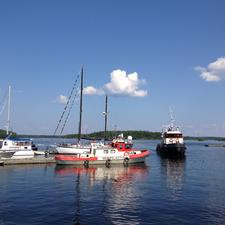
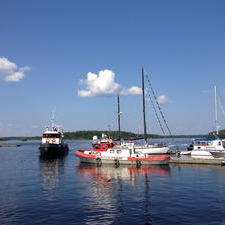
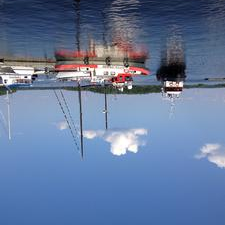
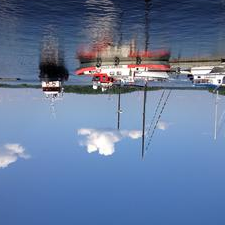

In [8]:
val dim = 100

val ext_base = listOf(0, dim, dim, dim + dim)
val ext_flip_x = listOf(dim + dim, 0 + dim, 0 + dim, dim + dim)
val ext_flip_y = listOf(0, dim, dim, 0)
val ext_transpose = listOf(dim + dim, 0 + dim, dim, 0)

val label_data = mapOf(
    "x" to listOf(50, 150, 150, 50),
    "y" to listOf(200, 200, 0, 0),
    "label" to listOf("original", "flip columns", "transpose", "flip rows")
)

(letsPlot() + 
     geomImshow(fisherBoat, extent=ext_base) + 
     geomImshow(fisherBoat, extent=ext_flip_x) + 
     geomImshow(fisherBoat, extent=ext_flip_y) + 
     geomImshow(fisherBoat, extent=ext_transpose) + 
        
     geomHLine(yintercept=100, color="yellow", tooltips=tooltipsNone) + 
     geomVLine(xintercept=100, color="yellow", tooltips=tooltipsNone) + 
     geomLabel(data=label_data) {x="x"; y="y"; label="label" } +
     ggsize(700, 700)
)